### 의사결정 나무
* 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석 기법
* 기회비용에 대한 고려, 기대 이익계산, 위험관리등 효율적인 결정이 필요한 분야에 사용되고 있음
* 의사결정트리는 회귀/분류에 사용되지만, 주로 분류에 많이 사용

In [1]:
import mldlpy3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

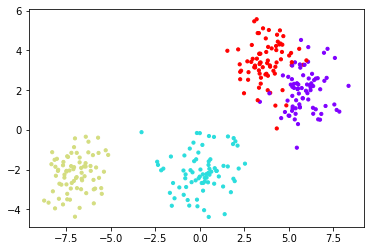

In [4]:
# 가상의 데이터를 이용한 의사결정나무 분석
# centers : 군집수
# cluster_std : 군집의 표준편차 (흩어짐 정도)
X,y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=2111091705)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=10)

In [5]:
# 의사결정트리로 분석후 시각화
dtclf = DecisionTreeClassifier()
dtclf.fit(X,y)
dtclf.score(X,y)

1.0

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


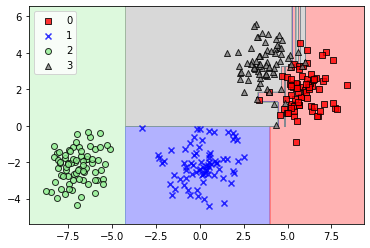

In [6]:
mldlpy3.plot_decision_regions(X,y,dtclf)

In [7]:
# 훈련/테스트 데이터로 나눠 재학습후 시각화
# criterion : 정보이득 알고리즘 지정(CART,gini,entropy)
# max_depth : 의사결정트리의 가지수
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=2111091705)

In [8]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [9]:
accuracy_score(ytest, pred)

0.9333333333333333

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


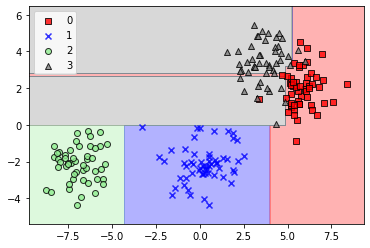

In [10]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, dtclf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


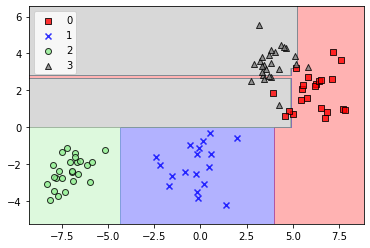

In [11]:
mldlpy3.plot_decision_regions(Xtest, ytest, dtclf)

### 분류결과를 tree형태로 시각화
* 출력하려면 graphviz라는 라이브러리 필요
* graphvis.org -> graphivz - 2.49.3
    + C:JAVA 아래에 압축해제
    + 폴더명은 graphviz-2.49로 설정
    + bin폴더를 PATH 환경변수로 등록
* 리눅스는 yum install -y graphviz
* 파이썬 pydotplus 패키지도 필요함 pip install pydotplus

In [12]:
import pydotplus
from sklearn import tree

In [13]:
# 그래프 관련 dot 데이터 추출
dot_data = tree.export_graphviz(dtclf, out_file=None)
# dot데이터를 토대로 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 그림파일로 저장
graph.write_png('img/blob.png')

True

In [14]:
# 그림파일을 주피터에서 출력
import matplotlib.image as pltimg

(-0.5, 1496.5, 636.5, -0.5)

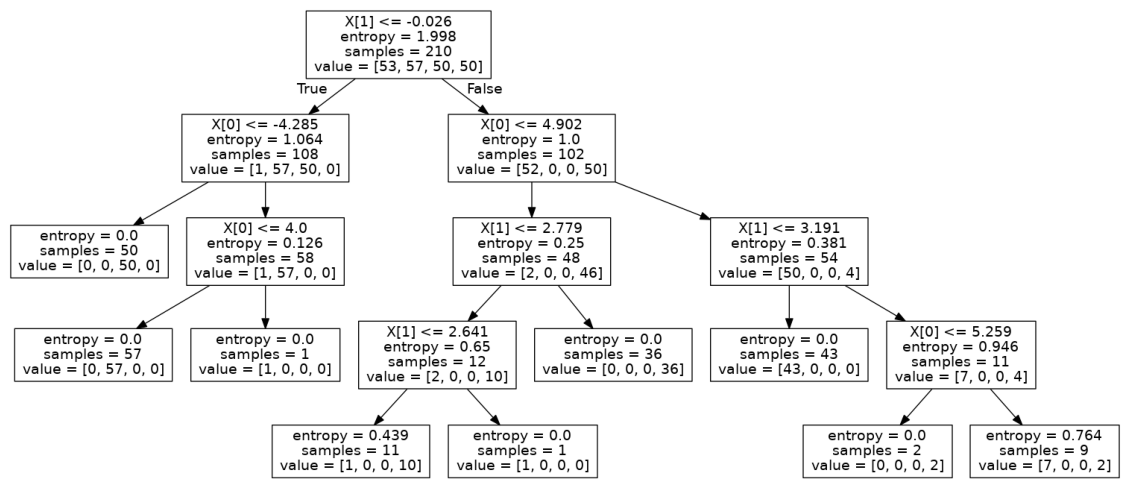

In [15]:
img = pltimg.imread('img/blob.png')
plt.figure(figsize=(20,12))
plt.imshow(img)
plt.axis('off')

### iris 데이터셋을 이용한 의사결정나무 분석

In [16]:
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [17]:
# 데이터 적재 및 분할
iris = load_iris()

In [48]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, random_state=2111100945)

In [49]:
dtclf = DecisionTreeClassifier(criterion='entropy')

In [50]:
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [51]:
accuracy_score(ytest, pred)

0.9555555555555556

In [56]:
# 의사결정나무 분석 시각화
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/isis.png')

True

(-0.5, 982.5, 740.5, -0.5)

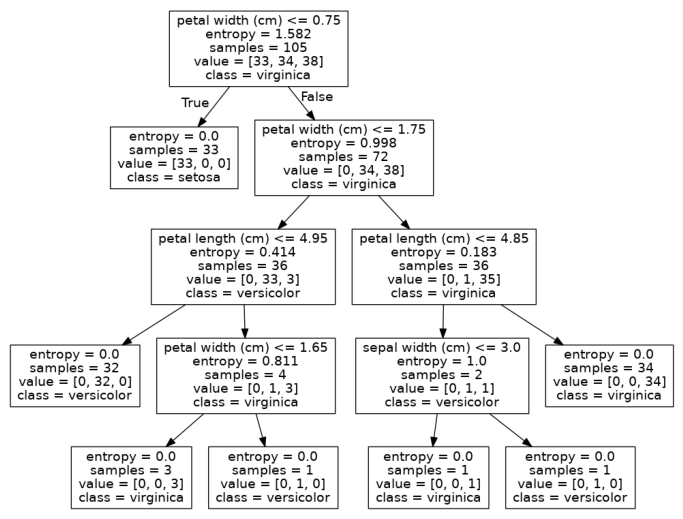

In [57]:
img = plt.imread('img/isis.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


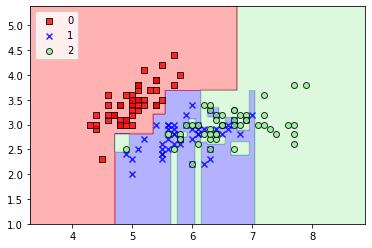

In [59]:
# 결정영역 시각화
xdata = iris.data[:, :2] # petal 계열만
dtclf.fit(xdata, iris.target)
mldlpy3.plot_decision_regions(xdata, iris.target, dtclf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


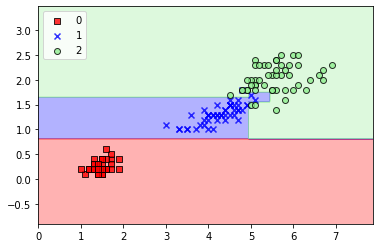

In [60]:
# 결정영역 시각화 2 
xdata = iris.data[:, 2:] # setal 계열만
dtclf.fit(xdata, iris.target)
mldlpy3.plot_decision_regions(xdata, iris.target, dtclf)